In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from scipy import stats
from scipy.stats import rankdata

In [2]:
# import 02445 Datasheet.csv as a pandas dataframe
df = pd.read_csv('02445 Datasheet.csv')
# separate the first 100 rows of the dataframe into a new dataframe and the last 100 rows into another dataframe
df_m = df.iloc[:100]
df_f = df.iloc[100:]

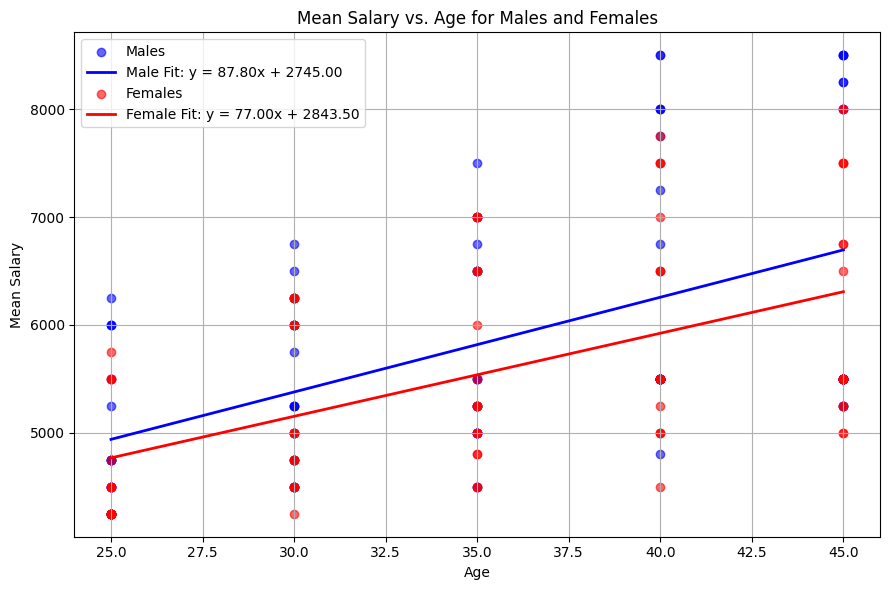

In [5]:
# Extract data
ages_m = df_m['age']
salaries_m = df_m['mean_salary']

ages_f = df_f['age']
salaries_f = df_f['mean_salary']

# --- Male regression ---
n_m = len(ages_m)
x_mean_m = sum(ages_m) / n_m
y_mean_m = sum(salaries_m) / n_m
slope_m = sum((ages_m.iloc[i] - x_mean_m) * (salaries_m.iloc[i] - y_mean_m) for i in range(n_m)) / \
          sum((ages_m.iloc[i] - x_mean_m)**2 for i in range(n_m))
intercept_m = y_mean_m - slope_m * x_mean_m

# --- Female regression ---
n_f = len(ages_f)
x_mean_f = sum(ages_f) / n_f
y_mean_f = sum(salaries_f) / n_f
slope_f = sum((ages_f.iloc[i] - x_mean_f) * (salaries_f.iloc[i] - y_mean_f) for i in range(n_f)) / \
          sum((ages_f.iloc[i] - x_mean_f)**2 for i in range(n_f))
intercept_f = y_mean_f - slope_f * x_mean_f

# Regression line values
x_vals = sorted(set(ages_m) | set(ages_f))  # Union of all unique age values
y_vals_m = [slope_m * x + intercept_m for x in x_vals]
y_vals_f = [slope_f * x + intercept_f for x in x_vals]

# --- Plotting ---
plt.figure(figsize=(9, 6))
plt.scatter(ages_m, salaries_m, color='blue', alpha=0.6, label='Males')
plt.plot(x_vals, y_vals_m, color='blue', linewidth=2, label=f'Male Fit: y = {slope_m:.2f}x + {intercept_m:.2f}')

plt.scatter(ages_f, salaries_f, color='red', alpha=0.6, label='Females')
plt.plot(x_vals, y_vals_f, color='red', linewidth=2, label=f'Female Fit: y = {slope_f:.2f}x + {intercept_f:.2f}')

plt.title('Mean Salary vs. Age for Males and Females')
plt.xlabel('Age')
plt.ylabel('Mean Salary')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [10]:
# Extract the salary data and group labels
x = df_m["mean_salary"].values
y = df_f["mean_salary"].values

n1 = len(x)
n2 = len(y)

# Combine data with group labels
all_values = np.concatenate([x, y])
groups = np.array(['M'] * n1 + ['F'] * n2)

# Rank the combined values
ranks = rankdata(all_values)  # average ranks for ties

# Create a DataFrame to see everything clearly
ranked_df = pd.DataFrame({
    'value': all_values,
    'rank': ranks,
    'group': groups
}).sort_values(by='rank').reset_index(drop=True)

print(ranked_df.head(20))  # see the top 10 ranked values


    value  rank group
0    4250   9.5     F
1    4250   9.5     M
2    4250   9.5     F
3    4250   9.5     M
4    4250   9.5     M
5    4250   9.5     M
6    4250   9.5     M
7    4250   9.5     F
8    4250   9.5     F
9    4250   9.5     F
10   4250   9.5     F
11   4250   9.5     F
12   4250   9.5     F
13   4250   9.5     M
14   4250   9.5     F
15   4250   9.5     F
16   4250   9.5     F
17   4250   9.5     F
18   4500  28.0     M
19   4500  28.0     F


In [8]:
# Extract the salary data
x = df_m["mean_salary"].values  # male
y = df_f["mean_salary"].values  # female

n1 = len(x)
n2 = len(y)

# Combine and rank all values
all_values = np.concatenate([x, y])
ranks = rankdata(all_values)  # assigns average ranks for ties

# Assign ranks back to original groups
ranks_x = ranks[:n1]
ranks_y = ranks[n1:]

# Sum ranks
R1 = np.sum(ranks_x)
R2 = np.sum(ranks_y)

# Compute U values
U1 = n1 * n2 + n1 * (n1 + 1) / 2 - R1
U2 = n1 * n2 + n2 * (n2 + 1) / 2 - R2

U = min(U1, U2)

# Compute mean and std for normal approximation
mu_U = n1 * n2 / 2
sigma_U = np.sqrt(n1 * n2 * (n1 + n2 + 1) / 12)

# Compute Z-score
Z = (U - mu_U) / sigma_U

print(f"U = {U:.2f}")
print(f"Z = {Z:.2f}")


U = 4381.00
Z = -1.51


### CLT and more below


In [ ]:
# Extract the mean_salary column as a list
salaries = df_m['mean_salary'].tolist()

# Number of data points
n = len(salaries)

# Calculate the mean
mean_salary = sum(salaries) / n

# Calculate the sum of squared differences from the mean
squared_diffs = [(x - mean_salary) ** 2 for x in salaries]

# Calculate the sample variance (denominator is n - 1 for unbiased estimate)
variance = sum(squared_diffs) / (n - 1)

# Calculate the standard deviation
std_dev = variance ** 0.5

print("Mean salary:", mean_salary)
print("Variance:", variance)
print("Standard Deviation:", std_dev)


In [6]:
# Standardize mean_salary values (compute z-scores)
z_scores = [(x - mean_salary) / std_dev for x in salaries]

# Optional: add the z-scores as a new column in df_m
df_m = df_m.copy()  # To avoid modifying the original dataframe directly
df_m['z_score'] = z_scores


NameError: name 'mean_salary' is not defined

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(z_scores, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Z-scores (Mean Salary)')
plt.xlabel('Z-score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [ ]:
plt.figure(figsize=(6, 6))
stats.probplot(z_scores, dist="norm", plot=plt)
plt.title("Q-Q Plot of Z-scores")
plt.grid(True)
plt.show()

In [ ]:
# Seed the random number generator for reproducibility
random.seed(0)

# Step 1: Parameters
sample_size = 100         # e.g., size of each sample (CLT kicks in nicely from n ≥ 30)
num_samples = 1000       # number of samples to draw

# Step 2: Generate the sample means
sample_means = []

for _ in range(num_samples):
    sample = random.choices(salaries, k=sample_size)  # sampling with replacement
    sample_mean = sum(sample) / sample_size
    sample_means.append(sample_mean)

# Step 3: Plot the distribution of sample means
plt.figure(figsize=(8, 5))
plt.hist(sample_means, bins=50, color='lightgreen', edgecolor='black', density=True)
plt.title(f'Distribution of Sample Means (n={sample_size}, {num_samples} samples)')
plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.grid(True)
plt.show()


In [ ]:
plt.figure(figsize=(6, 6))
stats.probplot(sample_means, dist="norm", plot=plt)
plt.title("Q-Q Plot of Sample Means")
plt.grid(True)
plt.show()